In [ ]:

# Install Ultralytics (YOLOv8 library)
!pip install ultralytics --upgrade

# Optional: Verify GPU
!nvidia-smi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 839.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving license-plate-detection-dataset-anpr-yolo-format.zip to license-plate-detection-dataset-anpr-yolo-format.zip


In [ ]:
import zipfile
import os

# Extracting the uploaded zip file
with zipfile.ZipFile('license-plate-detection-dataset-anpr-yolo-format.zip','r')  as zip_ref:
  zip_ref.extractall('/content')

# check contents
!ls /content/license-plate-detection-dataset-anpr-yolo-format.zip

/content/license-plate-detection-dataset-anpr-yolo-format.zip


In [ ]:
# ✅ Overwrite data.yaml with correct formatting
data_yaml = """
train: /content/YOLO_dataset/images/train
val: /content/YOLO_dataset/images/val

nc: 1
names: ['license_plate']
"""

with open("/content/YOLO_dataset/data.yaml", "w") as f:
    f.write(data_yaml)

print("✅ Fixed data.yaml created.")


✅ Fixed data.yaml created.


In [ ]:
from ultralytics import YOLO

model=YOLO('yolov8n.pt')

model.train(data='/content/YOLO_dataset/data.yaml',epochs=50,imgsz=640)

Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/YOLO_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

100%|██████████| 755k/755k [00:00<00:00, 21.5MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 105MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 94.3±43.1 MB/s, size: 421.6 KB)


train: Scanning /content/YOLO_dataset/labels/train... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:01<00:00, 322.90it/s]

train: New cache created: /content/YOLO_dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 29.9±18.6 MB/s, size: 130.0 KB)


val: Scanning /content/YOLO_dataset/labels/val... 133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<00:00, 293.54it/s]

val: New cache created: /content/YOLO_dataset/labels/val.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.08G      1.482      2.725      1.305         31        640: 100%|██████████| 33/33 [00:13<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        133        145    0.00417       0.91      0.271      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.58G      1.428      1.812       1.23         23        640: 100%|██████████| 33/33 [00:11<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.18it/s]

                   all        133        145      0.346      0.393      0.304      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.6G      1.462      1.607      1.244         28        640: 100%|██████████| 33/33 [00:10<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        133        145      0.693      0.579      0.625      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.61G      1.425      1.512      1.216         32        640: 100%|██████████| 33/33 [00:10<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]


                   all        133        145      0.436        0.6      0.426      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.63G      1.476      1.407      1.249         27        640: 100%|██████████| 33/33 [00:10<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]


                   all        133        145      0.708      0.538      0.579      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.65G       1.44      1.255      1.266         31        640: 100%|██████████| 33/33 [00:10<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.07it/s]

                   all        133        145      0.625      0.634      0.629      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.66G      1.393      1.132      1.204         26        640: 100%|██████████| 33/33 [00:11<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        133        145      0.854      0.729      0.825      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.68G      1.383      1.089      1.224         26        640: 100%|██████████| 33/33 [00:11<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.84it/s]

                   all        133        145      0.902      0.821       0.89       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.7G       1.38      1.058      1.223         27        640: 100%|██████████| 33/33 [00:11<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.14it/s]

                   all        133        145      0.754      0.745      0.783      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.72G       1.36      1.011      1.201         27        640: 100%|██████████| 33/33 [00:10<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]

                   all        133        145      0.891      0.752      0.845       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.73G      1.366     0.9455      1.198         29        640: 100%|██████████| 33/33 [00:11<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.23it/s]

                   all        133        145      0.859      0.807      0.879      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.75G      1.339     0.9146      1.193         20        640: 100%|██████████| 33/33 [00:11<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]

                   all        133        145      0.921      0.807      0.895      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.77G      1.339     0.9194      1.185         21        640: 100%|██████████| 33/33 [00:11<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.69it/s]

                   all        133        145      0.919        0.8      0.888      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.79G      1.312     0.8646      1.181         18        640: 100%|██████████| 33/33 [00:11<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]

                   all        133        145      0.937      0.834      0.904      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       2.8G      1.335     0.8883      1.185         22        640: 100%|██████████| 33/33 [00:11<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all        133        145      0.897      0.848      0.908      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.82G      1.303     0.8588      1.197         24        640: 100%|██████████| 33/33 [00:11<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]

                   all        133        145      0.874      0.862      0.901      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.84G       1.25     0.8333      1.139         24        640: 100%|██████████| 33/33 [00:11<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]

                   all        133        145      0.878      0.841       0.92      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.85G      1.289     0.8073      1.165         29        640: 100%|██████████| 33/33 [00:11<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.98it/s]

                   all        133        145      0.882      0.848      0.888      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.87G      1.274     0.7947      1.156         16        640: 100%|██████████| 33/33 [00:11<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.72it/s]

                   all        133        145      0.912      0.828      0.888      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.89G      1.256     0.7516      1.162         26        640: 100%|██████████| 33/33 [00:11<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.38it/s]

                   all        133        145      0.921      0.855      0.913      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       2.9G       1.25     0.7712      1.124         23        640: 100%|██████████| 33/33 [00:11<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]

                   all        133        145      0.899      0.834      0.913      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.92G      1.236     0.7409      1.141         20        640: 100%|██████████| 33/33 [00:11<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.32it/s]

                   all        133        145      0.923      0.855       0.91      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.94G       1.24     0.7353       1.16         22        640: 100%|██████████| 33/33 [00:11<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.37it/s]

                   all        133        145      0.891      0.869      0.916       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.96G       1.23     0.7248      1.145         23        640: 100%|██████████| 33/33 [00:11<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.53it/s]

                   all        133        145      0.915       0.82      0.899      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.97G      1.182     0.7323      1.125         25        640: 100%|██████████| 33/33 [00:11<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]

                   all        133        145      0.937       0.82      0.909      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.99G      1.191     0.7234      1.122         36        640: 100%|██████████| 33/33 [00:11<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]


                   all        133        145      0.934      0.876      0.934      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.01G      1.197     0.7061      1.144         22        640: 100%|██████████| 33/33 [00:11<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.08it/s]

                   all        133        145      0.947        0.8      0.913      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.02G      1.189     0.7051      1.141         27        640: 100%|██████████| 33/33 [00:10<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        133        145      0.915      0.834      0.903      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.04G      1.185     0.7012      1.108         25        640: 100%|██████████| 33/33 [00:10<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]

                   all        133        145      0.944      0.828      0.926       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.06G      1.155     0.6785      1.125         26        640: 100%|██████████| 33/33 [00:10<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]

                   all        133        145      0.907      0.873      0.934      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.07G      1.165     0.6593      1.117         34        640: 100%|██████████| 33/33 [00:10<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        133        145       0.95      0.883      0.938      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.09G       1.11     0.6579      1.097         30        640: 100%|██████████| 33/33 [00:10<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        133        145      0.883       0.89      0.902      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.11G      1.108     0.6395      1.098         25        640: 100%|██████████| 33/33 [00:10<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]

                   all        133        145      0.914       0.89      0.915      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.12G      1.128     0.6219      1.091         32        640: 100%|██████████| 33/33 [00:10<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.02it/s]

                   all        133        145      0.879        0.9      0.917      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.14G      1.082     0.6054      1.076         19        640: 100%|██████████| 33/33 [00:11<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]

                   all        133        145      0.928      0.897      0.928      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.16G      1.134     0.6351      1.101         22        640: 100%|██████████| 33/33 [00:11<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.37it/s]

                   all        133        145      0.905      0.903      0.929       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.18G      1.104     0.5913      1.081         31        640: 100%|██████████| 33/33 [00:10<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.08it/s]

                   all        133        145      0.948      0.874      0.936       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.19G      1.065     0.5711      1.074         31        640: 100%|██████████| 33/33 [00:11<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.98it/s]

                   all        133        145      0.901      0.876      0.928      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.21G      1.068     0.5835      1.064         18        640: 100%|██████████| 33/33 [00:11<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]

                   all        133        145      0.927      0.855      0.926       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.23G      1.034     0.5716      1.068         30        640: 100%|██████████| 33/33 [00:11<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.70it/s]

                   all        133        145      0.925      0.855      0.917      0.581


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.25G      1.042     0.5767      1.069         13        640: 100%|██████████| 33/33 [00:12<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.58it/s]

                   all        133        145      0.917      0.862      0.923      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.27G      1.035     0.5504      1.062         16        640: 100%|██████████| 33/33 [00:11<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]

                   all        133        145      0.897      0.903      0.929      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.28G      1.044     0.5345      1.054         13        640: 100%|██████████| 33/33 [00:11<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.87it/s]

                   all        133        145       0.93      0.869      0.933      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       3.3G     0.9948     0.5169      1.047         13        640: 100%|██████████| 33/33 [00:11<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]

                   all        133        145      0.915      0.889      0.923      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.31G     0.9689     0.5036      1.046         13        640: 100%|██████████| 33/33 [00:11<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.30it/s]

                   all        133        145      0.917       0.89       0.93      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.33G     0.9685     0.4998      1.032         14        640: 100%|██████████| 33/33 [00:11<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.48it/s]

                   all        133        145      0.936      0.903      0.944       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.35G     0.9609     0.4996      1.031         13        640: 100%|██████████| 33/33 [00:11<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.97it/s]

                   all        133        145      0.912      0.897      0.922      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.37G      0.943     0.4911      1.034         13        640: 100%|██████████| 33/33 [00:11<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.56it/s]

                   all        133        145      0.891      0.903      0.918      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.38G      0.927     0.4843      1.008         14        640: 100%|██████████| 33/33 [00:11<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.43it/s]

                   all        133        145      0.892      0.903      0.932      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       3.4G     0.9158     0.4711       1.03         13        640: 100%|██████████| 33/33 [00:10<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]

                   all        133        145      0.906      0.903      0.932      0.594



50 epochs completed in 0.189 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


                   all        133        145      0.906      0.903      0.932      0.596
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b0e25b64e90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_check_is_pytorch_model',
 '_compiled_call_impl',
 '_forward_hooks',
 '_forward_hooks_always_called',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_

In [ ]:
model.info()

Model summary: 129 layers, 3,011,043 parameters, 0 gradients, 8.2 GFLOPs


(129, 3011043, 0, 8.1941504)

In [ ]:
model.parameters()

<generator object Module.parameters at 0x7b0e25a7ef80>

In [ ]:
model.val()

Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1244.2±841.1 MB/s, size: 397.4 KB)


val: Scanning /content/YOLO_dataset/labels/val.cache... 133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.93it/s]


                   all        133        145      0.911      0.903      0.933      0.602
Speed: 1.1ms preprocess, 9.0ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train22


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b0e25501d90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
metrics=model.val() # This will give you pression,recall,mAp@0.5,mAP@0.5:0.95:Per-class instance count:

Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1447.7±143.5 MB/s, size: 279.2 KB)


val: Scanning /content/YOLO_dataset/labels/val.cache... 133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.83it/s]


                   all        133        145      0.911      0.903      0.933      0.602
Speed: 3.4ms preprocess, 4.9ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train23


In [ ]:
print(type(metrics))

<class 'ultralytics.utils.metrics.DetMetrics'>


In [ ]:
print('Pression:',metrics.box.p)# Precision: The proportion of correctly predicted positive detections out of all positive predictions.
print('Recall:',metrics.box.r)# Recall: The proportion of correctly predicted positive detections out of all actual positives.
print('mAP@0.5:',metrics.box.map50)
print('mAP@0.5:0.95:',metrics.box.map)
print('f1:',metrics.box.f1)

Pression: [    0.91111]
Recall: [    0.90345]
mAP@0.5: 0.9332364906222437
mAP@0.5:0.95: 0.6019108579090469
f1: [    0.90726]


In [ ]:
# IoU (Intersection over Union): Ratio of overlap area to union area between predicted and actual bounding boxes.


# Precision per class: Fraction of correctly predicted positive instances out of all predicted positives.
print("Precision per class (metrics.box.p):", metrics.box.p)

# Recall per class: Fraction of correctly predicted positive instances out of all actual positives.
print("Recall per class (metrics.box.r):", metrics.box.r)

# F1-score per class: Harmonic mean of precision and recall.
print("F1-score per class (metrics.box.f1):", metrics.box.f1)

# AP@[0.5:0.95] per class: Average Precision averaged over IoU thresholds from 0.5 to 0.95 (stricter and more accurate).
print("AP@[0.5:0.95] per class (metrics.box.ap()):", metrics.box.ap)

# Mean Precision: Average of per-class precision.
print("Mean Precision (metrics.box.mp()):", metrics.box.mp)

# Mean Recall: Average of per-class recall.
print("Mean Recall (metrics.box.mr()):", metrics.box.mr)

# Mean Average Precision @ IoU=0.5: Overall average precision when IoU threshold is 0.5.
print("mAP@0.5 (metrics.box.map50()):", metrics.box.map50)

# Mean Average Precision averaged over IoU thresholds 0.5 to 0.95: Stricter evaluation across multiple thresholds.
print("mAP@[0.5:0.95] (metrics.box.map()):", metrics.box.map)


Precision per class (metrics.box.p): [    0.91111]
Recall per class (metrics.box.r): [    0.90345]
F1-score per class (metrics.box.f1): [    0.90726]
AP@[0.5:0.95] per class (metrics.box.ap()): [    0.60191]
Mean Precision (metrics.box.mp()): 0.9111096665223684
Mean Recall (metrics.box.mr()): 0.903448275862069
mAP@0.5 (metrics.box.map50()): 0.9332364906222437
mAP@[0.5:0.95] (metrics.box.map()): 0.6019108579090469


In [ ]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_check_is_pytorch_model',
 '_compiled_call_impl',
 '_forward_hooks',
 '_forward_hooks_always_called',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_

In [ ]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
img=cv2.imread('Numberplate.jpeg')

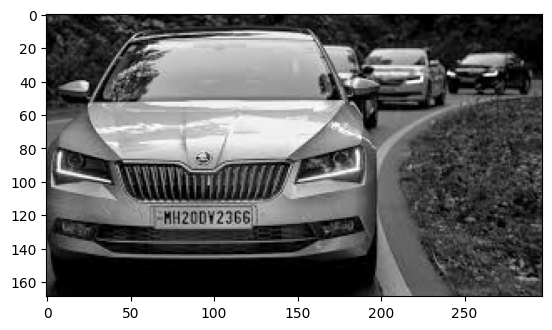

In [ ]:
plt.imshow(img)

In [ ]:
model.predict(img,save=True)


0: 384x640 1 license_plate, 38.8ms
Speed: 18.3ms preprocess, 38.8ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/train24


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'license_plate'}
 obb: None
 orig_img: array([[[ 0,  0,  0],
         [31, 31, 31],
         [25, 25, 25],
         ...,
         [ 0,  0,  0],
         [ 8,  8,  8],
         [ 3,  3,  3]],
 
        [[51, 51, 51],
         [44, 44, 44],
         [35, 35, 35],
         ...,
         [ 1,  1,  1],
         [ 6,  6,  6],
         [ 3,  3,  3]],
 
        [[70, 70, 70],
         [65, 65, 65],
         [84, 84, 84],
         ...,
         [ 7,  7,  7],
         [ 3,  3,  3],
         [ 0,  0,  0]],
 
        ...,
 
        [[41, 41, 41],
         [40, 40, 40],
         [30, 30, 30],
         ...,
         [68, 68, 68],
         [68, 68, 68],
         [40, 40, 40]],
 
        [[38, 38, 38],
         [39, 39, 39],
         [30, 30, 30],
         ...,
         [90, 90, 90],
         [78, 78, 78],
         [57, 57, 57]],
 
        [[30, 30, 30

In [ ]:
!pip install IPython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.9 MB/s eta 0:00:00



0: 384x640 1 license_plate, 9.1ms
Speed: 2.9ms preprocess, 9.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


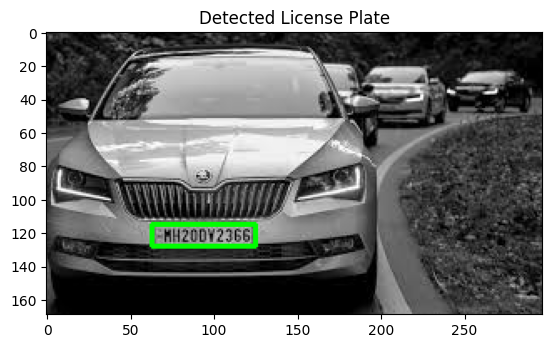

In [ ]:
result=model.predict(img)

#Get the first result(image)
res=result[0]

#Convert to numpy and get the boxes
img=res.orig_img.copy()
boxes=res.boxes #Contains x,y,x,y,conf,cls

#Draw boxes mannually
for box in boxes.xyxy:
  x1,y1,x2,y2=map(int,box) # Conver from tensor to int
  cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)

# plot image
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('Detected License Plate')
plt.show()

In [ ]:
img=res.orig_img.copy()
boxes=res.boxes #Contains x,y,x,y,conf,cls

In [ ]:
dir(res.boxes)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'cls',
 'conf',
 'cpu',
 'cuda',
 'data',
 'id',
 'is_track',
 'numpy',
 'orig_shape',
 'shape',
 'to',
 'xywh',
 'xywhn',
 'xyxy',
 'xyxyn']

	zip warning: name not matched: /content/runs/detect/train/weights/best.pt

zip error: Nothing to do! (try: zip -r best_model.zip . -i /content/runs/detect/train/weights/best.pt)


In [ ]:
#step 1 check where the model is this the model will be in one of this
!ls /content/runs/detect/


train  train2  train22	train23  train24


In [ ]:
# Ths model is in train2
!ls /content/runs/detect/train2/weights/

best.pt  last.pt


In [ ]:
#Zip the model
!zip -r best_model.zip /content/runs/detect/train2/weights/best.pt

  adding: content/runs/detect/train2/weights/best.pt (deflated 10%)


In [ ]:
#download the model
from google.colab import files
files.download('best_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>